Plot MC chains for simulations on Pokec in order to illustrate the burn-in time.

Created on: 07/12/20

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
from matplotlib.lines import Line2D
graph = nx.read_graphml('Data/Bratislava_graph.graphml')

In [77]:
beta_f=8.0
gradient=1.0  #10.0



# Random initial conditions:
# data=pd.read_csv(f"Data/mc_chain_examples/random_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")
# Negative aligned initial conditions:

init_type = 'pos' 
pos_data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")

init_type = 'random'
random_data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")
# Acidentally left out of current data
T = int(3*(10**6))
sample_spacing=1000
random_data['timestep']=list(np.arange(0,T,1))[0::sample_spacing]

init_type= 'neg'
neg_data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")

In [ ]:
#To do: make the full plot the inset.
# i.e. show zoomed in for the main plot to show robustness.
# Add average,max,min / declare stats?

#Try and use 50 in each case? i.e. so we have the same.

Pos: 4 chains
Neg: 55 chains
Rand: 61 chains


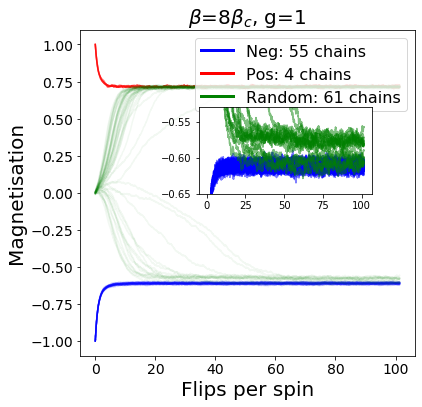

In [78]:
fig,ax=plt.subplots(figsize=(6,6))

# Positive
print(f"Pos: {len(pos_data.columns)-1} chains")
for chain_index in range(len(pos_data.columns)-1) :
    flips_per_spin=[ k/len(graph) for k in pos_data['timestep'].to_list()]
    plt.plot(flips_per_spin,pos_data[f'chain_{chain_index}'].to_list(),'r',alpha=0.5)
    
# Negative
print(f"Neg: {len(neg_data.columns)-1} chains")
for chain_index in range(len(neg_data.columns)-1) :
    flips_per_spin=[ k/len(graph) for k in neg_data['timestep'].to_list()]
    plt.plot(flips_per_spin,neg_data[f'chain_{chain_index}'].to_list(),'b',alpha=0.05)
    
# Random 
print(f"Rand: {len(random_data.columns)-1} chains")
for chain_index in range(len(random_data.columns)-1) :
    flips_per_spin=[ k/len(graph) for k in random_data['timestep'].to_list()]
    plt.plot(flips_per_spin,random_data[f'chain_{chain_index}'].to_list(),'g',alpha=0.05)
    
plt.xlabel("Flips per spin",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f"$\\beta$={int(beta_f)}$\\beta_c$, g={int(gradient)}",fontsize=20)

colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = [f'Neg: {len(neg_data.columns)-1} chains', f'Pos: {len(pos_data.columns)-1} chains', f'Random: {len(random_data.columns)-1} chains']
plt.legend(lines, labels,fontsize=16,loc='upper right')


if gradient==10 :
    left, bottom, width, height = [0.4, 0.2, 0.4, 0.2]
elif gradient == 1 :
    left, bottom, width, height = [0.4, 0.5, 0.4, 0.2]

ax2 = fig.add_axes([left, bottom, width, height])
for chain_index in range(len(neg_data.columns)-1) :
    ax2.plot(flips_per_spin,neg_data[f'chain_{chain_index}'].to_list(),'b',alpha=0.5)
for chain_index in range(len(random_data.columns)-1) :
    ax2.plot(flips_per_spin,random_data[f'chain_{chain_index}'].to_list(),'g',alpha=0.5)

if gradient == 10 :
    ax2.set_ylim(-0.2,-0.15)
elif gradient == 1.0 :
    ax2.set_ylim(-0.65,-0.53)

#plt.ylim(-0.20,-0.15)
plt.savefig(f"Plots/spin_burn_in_3_inits_beta_{beta_f}_g_{gradient}".replace('.','-') + ".jpg",bbox_inches='tight')
#plt.savefig(f"Plots/spin_burn_in_{init_type}_beta_{beta_f}_g_{gradient}".replace('.','-'))

### Plot for a single initial condition type

Text(0.5, 1.0, 'Plot illustrating $P(M | T=3x10,s_0=(...))$')

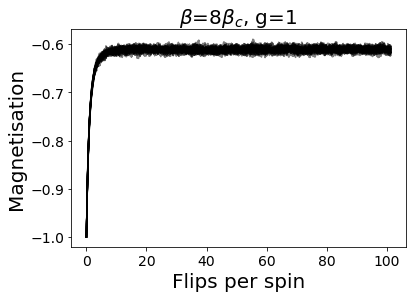

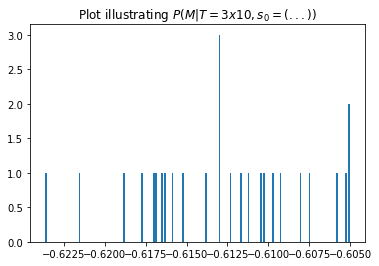

In [68]:
beta_f=8.0
gradient=1.0  #10.0

init_type = 'neg' #'random'#'pos' #'neg' 
data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")

T = int(3*(10**6))
sample_spacing=1000
data['timestep']=list(np.arange(0,T,1))[0::sample_spacing]


chain_ends=[]
flips_per_spin=[ k/len(graph) for k in data['timestep'].to_list()]
plt.figure(1)
for chain_index in range(len(data.columns)-1) :
    plt.plot(flips_per_spin,data[f'chain_{chain_index}'].to_list(),'k',alpha=0.5)
    chain_ends.append(data[f'chain_{chain_index}'].to_list()[-1])
    
plt.xlabel("Flips per spin",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f"$\\beta$={int(beta_f)}$\\beta_c$, g={int(gradient)}",fontsize=20)

plt.figure(2)
plt.hist(chain_ends,bins=200)
plt.title("Plot illustrating $P(M | T=3x10,s_0=(...))$")
#plt.xlim(-0.7,-0.5)

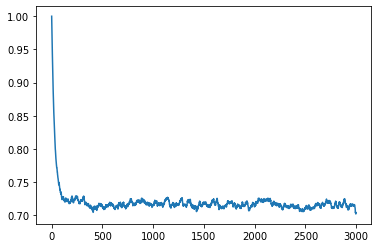

In [16]:
plt.plot(data['chain_0'].to_list() )

In [19]:
for chain_index in range(len(data.columns)) :
    print(chain_index)

0


In [22]:
data

,chain_0,timestep
0,1.000000,0
1,0.990332,1000
2,0.981340,2000
3,0.972618,3000
4,0.964032,4000
...,...,...
2995,0.703063,2995000
2996,0.702116,2996000
2997,0.701913,2997000
2998,0.702860,2998000
